## Importing Libraries 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling the data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algorithms to use

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate de model

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# For tuning the model

from sklearn.model_selection import GridSearchCV

# To ignore warnings

import warnings
warnings.filterwarnings("ignore")

## Loading dataset

In [3]:
df = pd.read_csv('/Users/franciscajara/Dropbox/Coding/predicting-flight-delay/dataset-SCL.csv')

In [4]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [5]:
df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [7]:
df.nunique()

Fecha-I      53252
Vlo-I          750
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          866
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

In [8]:
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [9]:
# Dropping columns with only 1 unique value.

df = df.drop(['Ori-I', 'Ori-O', 'SIGLAORI'], axis = 1)

In [10]:
df.shape

(68206, 15)

## EDA

### Summary statistics of some categorical variables

In [11]:
cols = ["TIPOVUELO", "OPERA", "SIGLADES"]

for column in cols:
    print("Unique values in", column, "are:")
    print(df[column].value_counts(normalize = True))
    print("*" * 50)

Unique values in TIPOVUELO are:
N    0.541976
I    0.458024
Name: TIPOVUELO, dtype: float64
**************************************************
Unique values in OPERA are:
Grupo LATAM                 0.599537
Sky Airline                 0.209630
Aerolineas Argentinas       0.028575
Copa Air                    0.027124
Latin American Wings        0.024543
Avianca                     0.016890
JetSmart SPA                0.016054
Gol Trans                   0.011817
American Airlines           0.011099
Air Canada                  0.008284
Iberia                      0.005307
Delta Air                   0.005249
Air France                  0.005249
Aeromexico                  0.005146
United Airlines             0.004912
Oceanair Linhas Aereas      0.004091
Alitalia                    0.003797
K.L.M.                      0.003680
British Airways             0.003006
Qantas Airways              0.002859
Lacsa                       0.001349
Austral                     0.001085
Plus Ultra Line

## Feature engineering

### Creating additional columns: high_season, min_diff, delay_15, period_day

In [12]:
# First, transforming date from string to datetime type.

df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d')

In [13]:
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLADES             object
dtype: object

#### 1) high_season

In [14]:
# Creating this new column to identify if flights happen during high season periods.

df['high_season'] = np.where( (df['Fecha-I'].dt.month == 12) & (df['Fecha-I'].dt.day >= 12) | (df['Fecha-I'].dt.month <= 2) | (df['Fecha-I'].dt.month <= 3) & (df['Fecha-I'].dt.day <= 3) |  (df['Fecha-I'].dt.month == 7) & (df['Fecha-I'].dt.day >= 15) | (df['Fecha-I'].dt.month == 9) & (df['Fecha-I'].dt.day >= 11) , 1, 0)

In [15]:
df.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Miami,1
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Miami,1
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Miami,1
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Miami,1
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Miami,1


#### 2) min_diff

In [16]:
# Difference in minutes between 'Fecha-O' and 'Fecha-I' to check delay

df['min_diff'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60


In [17]:
df.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Miami,1,3.0
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Miami,1,9.0
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Miami,1,9.0
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Miami,1,3.0
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Miami,1,-2.0


#### 3) delay_15

In [18]:
# Creating this new column considering if the delay is over 15 minutes or not.

df['delay_15'] = np.where(df['min_diff'] > 15, 1, 0)

In [19]:
# (Selecting this row just to check that is working)
df.iloc[9]

Fecha-I        2017-01-11 23:30:00
Vlo-I                          226
Des-I                         KMIA
Emp-I                          AAL
Fecha-O        2017-01-12 00:39:00
Vlo-O                          226
Des-O                         KMIA
Emp-O                          AAL
DIA                             12
MES                              1
AÑO                           2017
DIANOM                      Jueves
TIPOVUELO                        I
OPERA            American Airlines
SIGLADES                     Miami
high_season                      1
min_diff                      69.0
delay_15                         1
Name: 9, dtype: object

In [20]:
df.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,delay_15
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Miami,1,3.0,0
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Miami,1,9.0,0
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Miami,1,9.0,0
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Miami,1,3.0,0
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Miami,1,-2.0,0


#### 4) period_day

In [21]:
# Creating this columns to identify in what period of the day the flight is scheduled.

start_morning_time = pd.to_datetime('05:00:00').time()
end_morning_time = pd.to_datetime('11:59:00').time()

start_afternoon_time = pd.to_datetime('12:00:00').time()
end_afternoon_time = pd.to_datetime('18:59:00').time()

period_day = []

for time in df['Fecha-I']:
    if start_morning_time <= time.time() <= end_morning_time:
        period_day.append('Morning')
    elif start_afternoon_time <= time.time() <= end_afternoon_time:
        period_day.append('Afternoon')
    else:
        period_day.append('Night')

df['period-day'] = period_day


In [22]:
df.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,delay_15,period-day
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Miami,1,3.0,0,Night
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Miami,1,9.0,0,Night
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Miami,1,9.0,0,Night
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Miami,1,3.0,0,Night
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Miami,1,-2.0,0,Night


## Visualizing behaviour of the delay rate across destination, airline, month of the year, day of the week, season and type of flight.

### WHAT'S THE STORYLINE I WANT TO SHOW HERE?

In [71]:
# Getting the delay rate

df.delay_15.value_counts(normalize=True)

0    0.81506
1    0.18494
Name: delay_15, dtype: float64

In [72]:
# Now the delay rate in porcentage

df.delay_15.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    81.5%
1    18.5%
Name: delay_15, dtype: object

## Crosstabs

In [138]:
pd.crosstab(df['OPERA'], df['SIGLADES'])

SIGLADES,Antofagasta,Arica,Asuncion,Atlanta,Auckland N.Z.,Balmaceda,Bariloche,Bogota,Buenos Aires,Calama,...,"San Juan, Arg.",Santa Cruz,Sao Paulo,Sydney,Temuco,Toronto,Tucuman,Ushuia,Valdivia,Washington
OPERA,,,,,,,,,,,,,,,,,,,,,
Aerolineas Argentinas,0,0,0,0,0,0,0,0,1949,0,...,0,0,0,0,0,0,0,0,0,0
Aeromexico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Air Canada,0,0,0,0,0,0,0,0,282,0,...,0,0,0,0,0,283,0,0,0,0
Air France,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alitalia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
American Airlines,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austral,0,0,0,0,0,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,0
Avianca,0,0,0,0,0,0,0,885,0,0,...,0,0,0,0,0,0,0,0,0,0
British Airways,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
pd.crosstab(df['SIGLADES'], df['delay_15'], normalize = 'index')

delay_15,0,1
SIGLADES,,
Antofagasta,0.853612,0.146388
Arica,0.864532,0.135468
Asuncion,0.715517,0.284483
Atlanta,0.941341,0.058659
Auckland N.Z.,0.626039,0.373961
...,...,...
Toronto,0.685512,0.314488
Tucuman,0.736842,0.263158
Ushuia,0.333333,0.666667


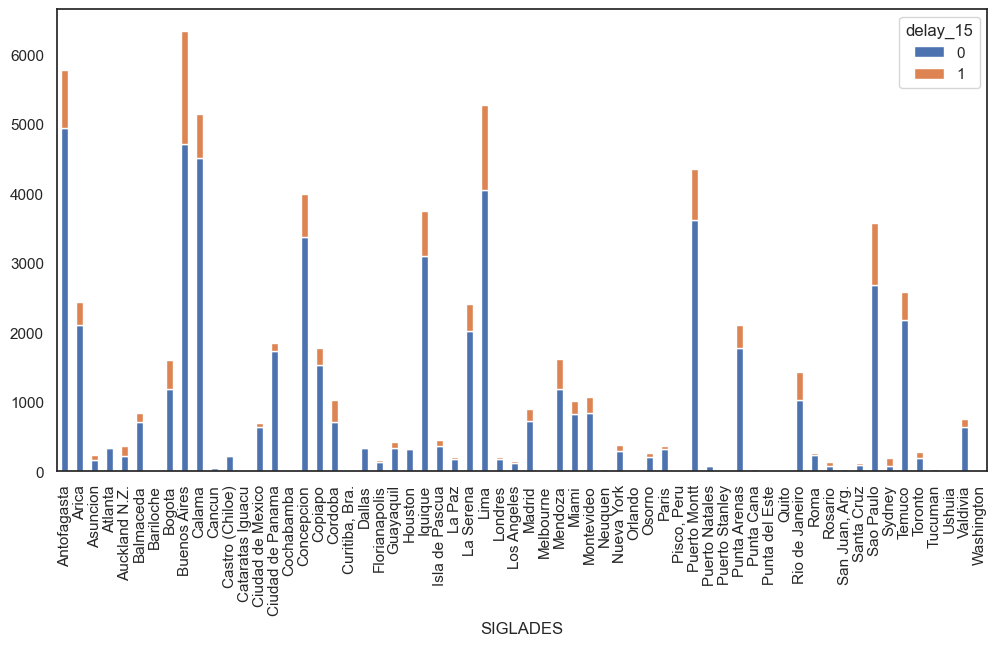

In [167]:
pd.crosstab(df['SIGLADES'], df['delay_15']).plot(kind = 'bar', stacked = True, figsize=(12,6))

plt.show()

In [183]:
pd.crosstab(df['OPERA'], df['delay_15'], normalize = 'index')

delay_15,0,1
OPERA,,
Aerolineas Argentinas,0.759877,0.240123
Aeromexico,0.971510,0.028490
Air Canada,0.543363,0.456637
Air France,0.916201,0.083799
Alitalia,0.888031,0.111969
American Airlines,0.932629,0.067371
Austral,0.797297,0.202703
Avianca,0.734375,0.265625
British Airways,0.858537,0.141463


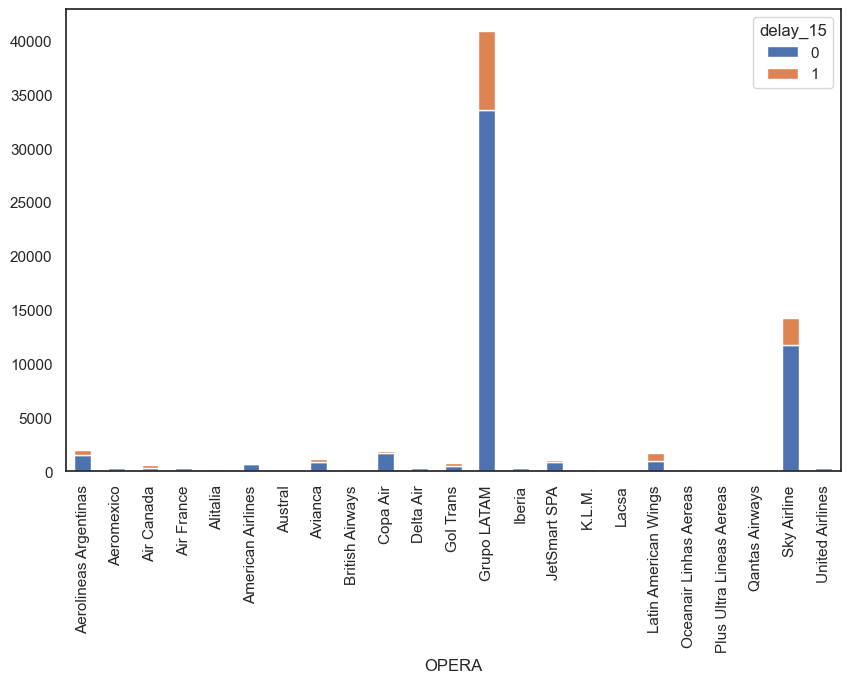

In [174]:
pd.crosstab(df['OPERA'], df['delay_15']).plot(kind = 'bar', stacked = True, figsize=(10,6))

plt.show()

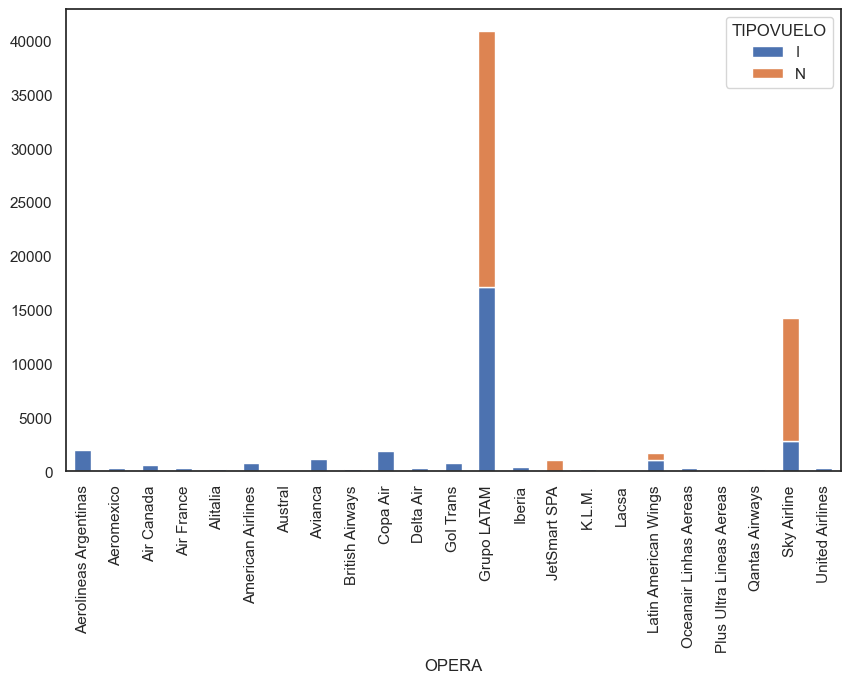

In [175]:
pd.crosstab(df['OPERA'], df['TIPOVUELO']).plot(kind = 'bar', stacked = True, figsize=(10,6))

plt.show()

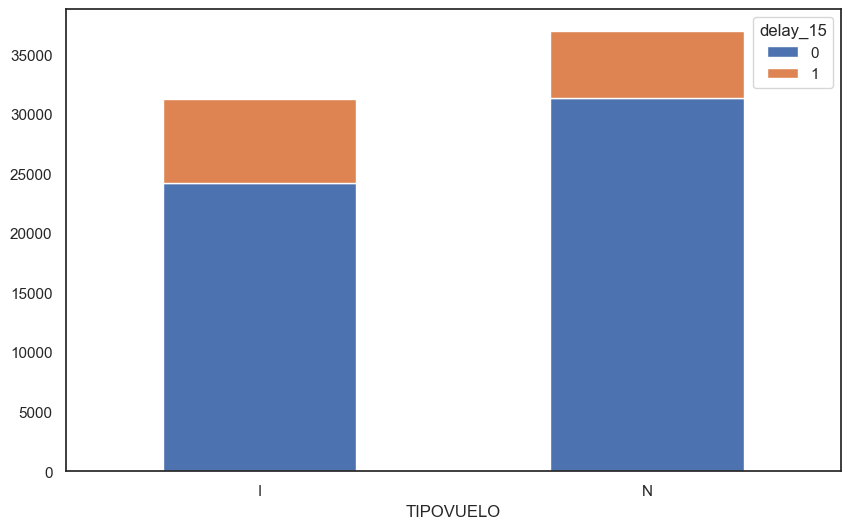

In [177]:
pd.crosstab(df['TIPOVUELO'], df['delay_15']).plot(kind = 'bar', stacked = True, figsize=(10,6), rot = 0)

plt.show()

## Barplots

### Barplot 1: shows the distribution of the flights considering delays, throughout the months of the year, and the type of flight (N or I).

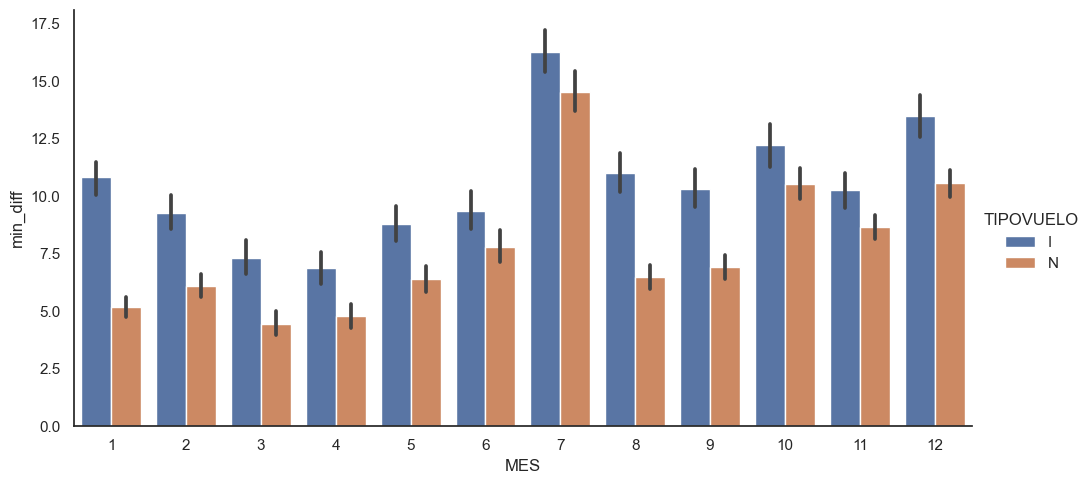

In [162]:
# I want to see the distribution and correlation between them.

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.catplot(x='MES', y='min_diff', kind = 'bar', hue='TIPOVUELO', data=df, height=5, aspect=2) 

plt.show()

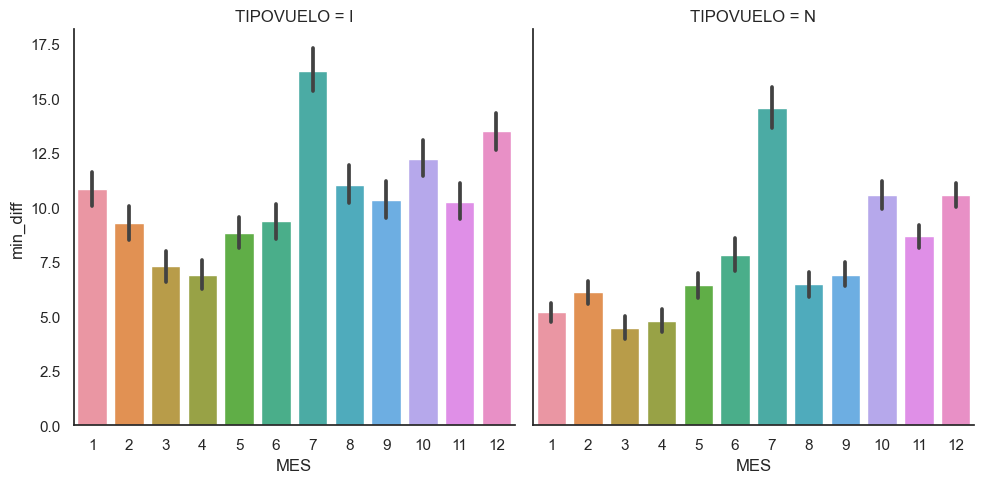

In [104]:
# I want to see the distribution and correlation between them.

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.catplot(x='MES', y='min_diff', kind = 'bar', col='TIPOVUELO', data=df) 

plt.show()

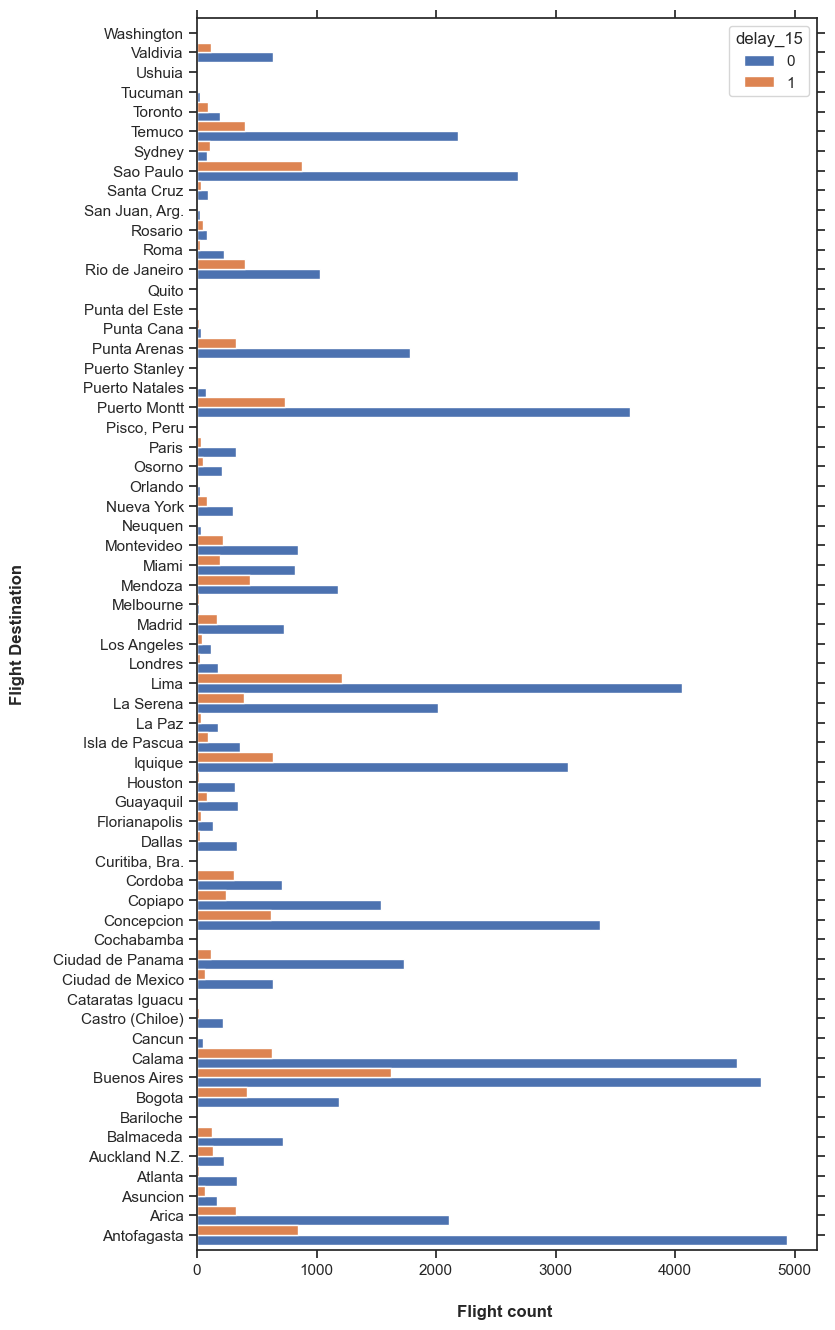

In [105]:
# Getting the distribution of the delay rate across destination (column SIGLADES)

ax = pd.crosstab(df.SIGLADES, df.delay_15).plot(kind="barh",stacked=False, figsize=(8, 16), zorder=2, width=1)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Set x-axis label
ax.set_xlabel("Flight count ", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Flight Destination", labelpad=20, weight='bold', size=12)

plt.show()


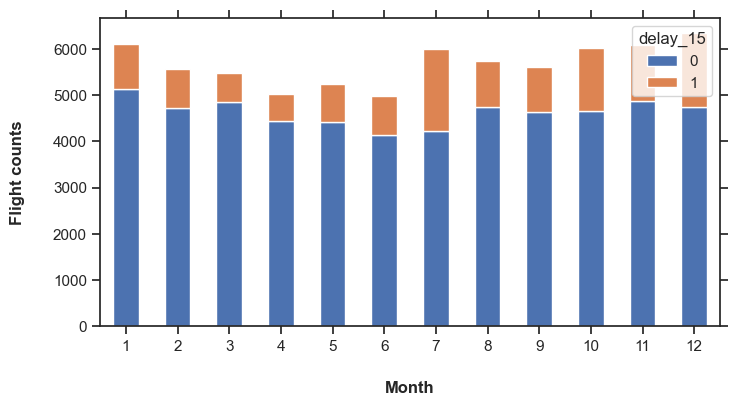

In [134]:
# Getting the distribution of the delay rate across day of the week (column DIANOM)

ax = pd.crosstab(df.MES, df.delay_15).plot(kind="bar",stacked=True, rot=0, figsize=(8, 4), zorder=2, width=0.5)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Set x-axis label
ax.set_xlabel("Month", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Flight counts", labelpad=20, weight='bold', size=12)

plt.show()

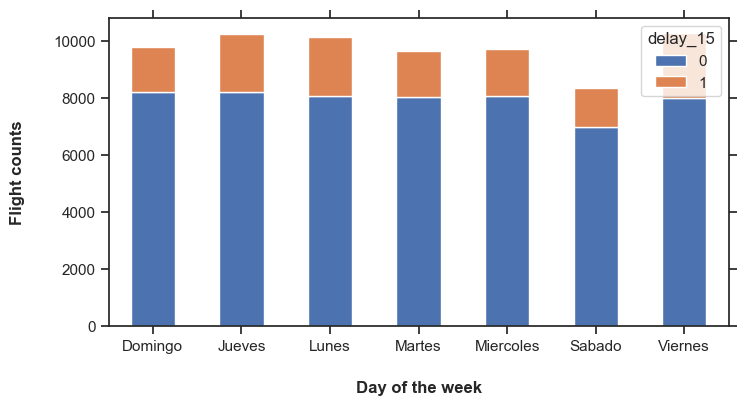

In [135]:
# Getting the distribution of the delay rate across day of the week (column DIANOM)

ax = pd.crosstab(df.DIANOM, df.delay_15).plot(kind="bar",stacked=True, rot=0, figsize=(8, 4), zorder=2, width=0.5)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Set x-axis label
ax.set_xlabel("Day of the week", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Flight counts", labelpad=20, weight='bold', size=12)

plt.show()

Text(0, 0.5, 'Flight counts')

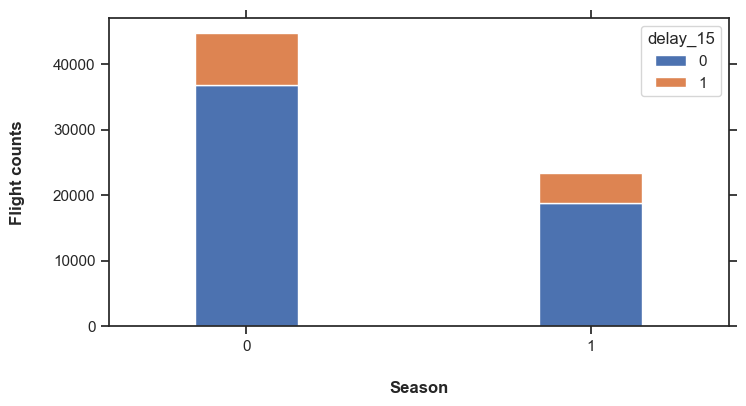

In [136]:
# Getting the distribution of the delay rate across season (column high_season)

ax = pd.crosstab(df.high_season, df.delay_15).plot(kind="bar",stacked=True, rot=0, figsize=(8, 4), zorder=2, width=0.3)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Set x-axis label
ax.set_xlabel("Season", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Flight counts", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Flight counts')

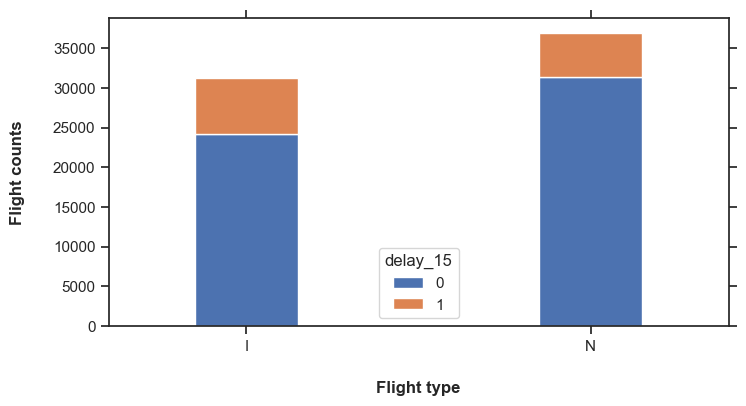

In [137]:
# Getting the distribution of the delay rate across type of flight (column TIPOVUELO)

ax = pd.crosstab(df.TIPOVUELO, df.delay_15).plot(kind="bar",stacked=True, rot=0, figsize=(8, 4), zorder=2, width=0.3)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Set x-axis label
ax.set_xlabel("Flight type", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Flight counts", labelpad=20, weight='bold', size=12)

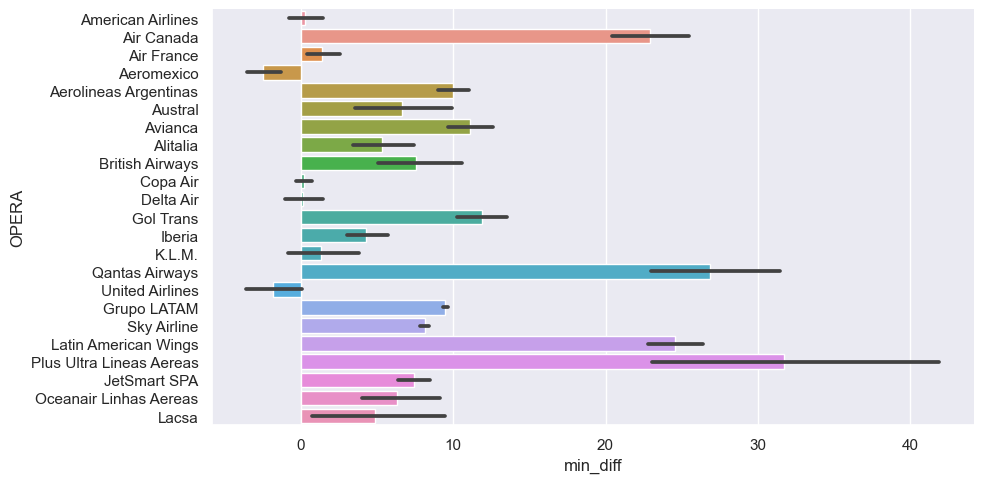

In [161]:
#set seaborn plotting aesthetics
sns.set(style='darkgrid')

#create grouped bar chart
sns.catplot(x='min_diff', y = 'OPERA', kind = 'bar', data=df, height=5, aspect=2) 

plt.show()


## Countplots

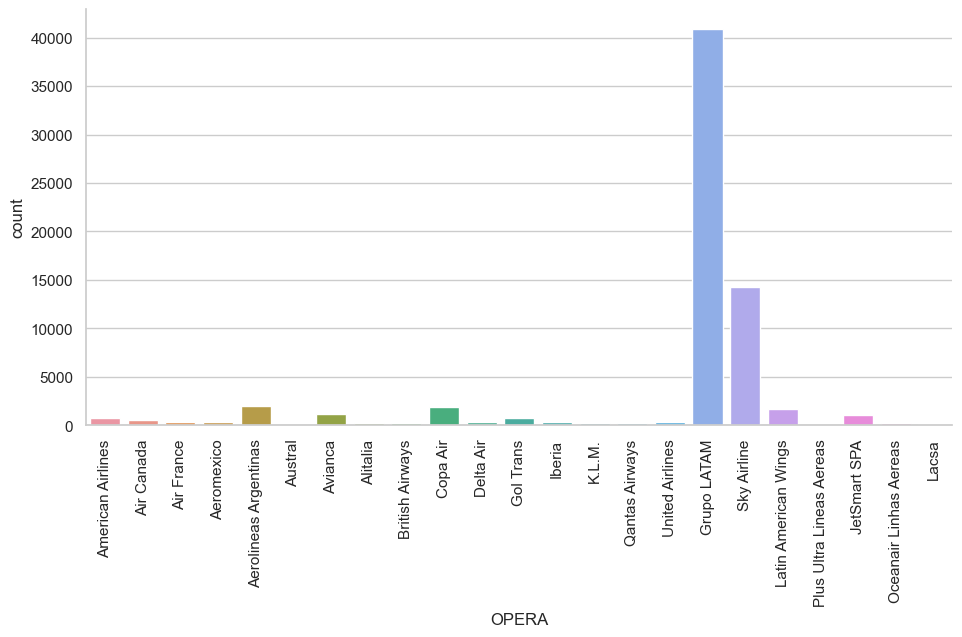

In [160]:
sns.catplot(x='OPERA', kind='count', data=df, height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

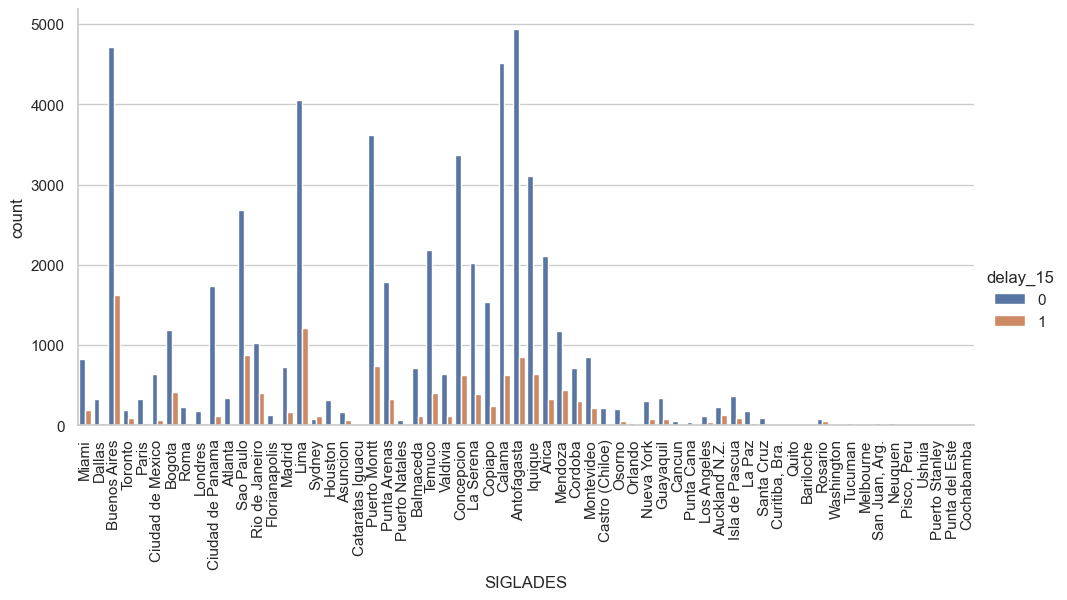

In [159]:
sns.catplot(x='SIGLADES', hue = 'delay_15', kind='count', data=df, height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

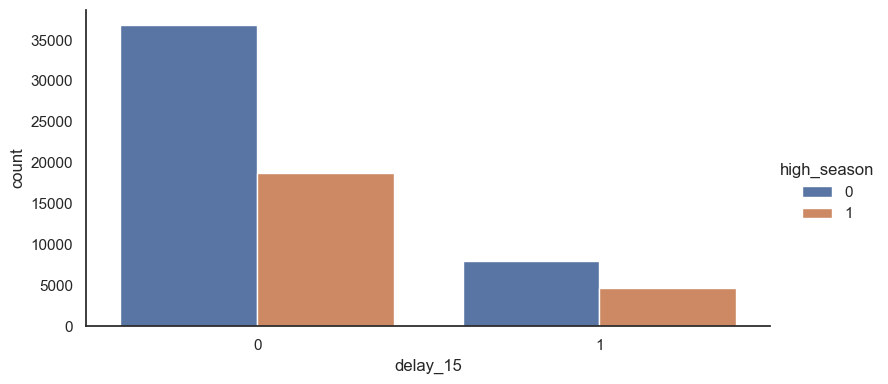

In [172]:
sns.catplot(x='delay_15', kind='count', hue = 'high_season', data=df, height=4, aspect=2)

plt.show()

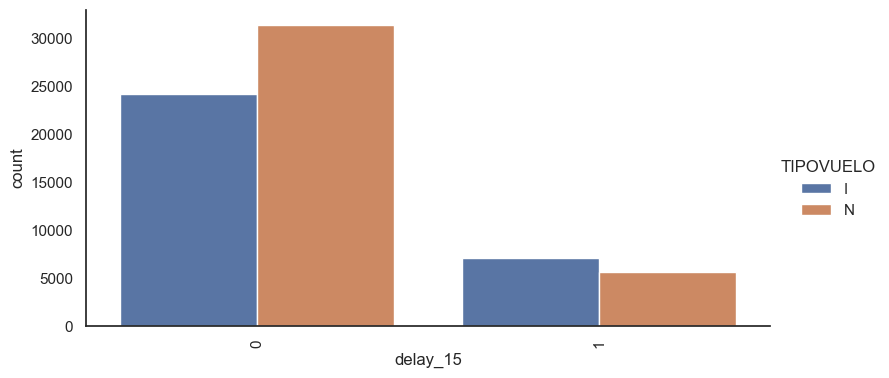

In [170]:
#ESTE NO SE SI AYUDA

sns.catplot(x='delay_15', kind='count', hue = 'TIPOVUELO', data=df, height=4, aspect=2)
plt.xticks(rotation=90)
plt.show()

## Pointplots

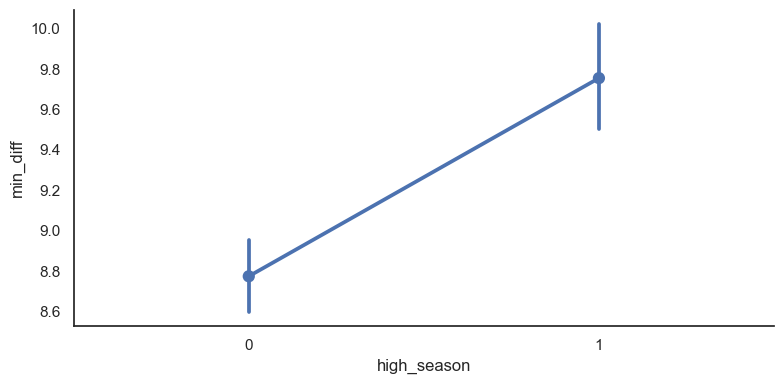

In [169]:
sns.catplot(x='high_season', y='min_diff', data=df, kind='point', height=4, aspect=2)
plt.show()

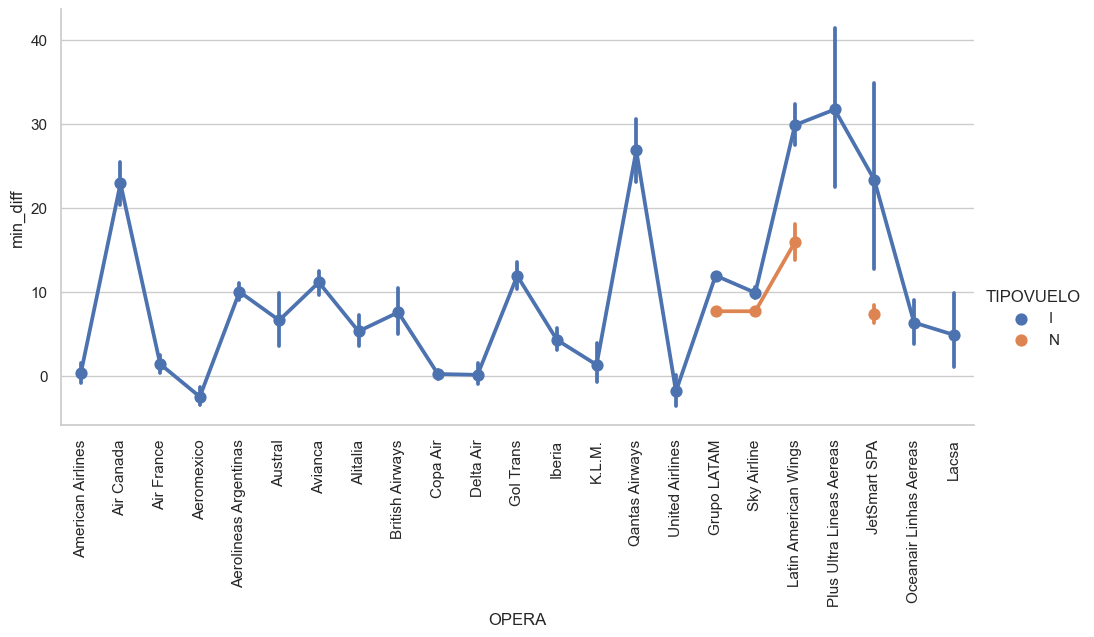

In [158]:
#ESTE Y EL SIGUIENTE ME GUSTARON MUCHO POR LOS INSIGHTS QUE MUESTRAN DIFERENTES A LOS OTROS, PERO OJO, AQUI NO MUESTRA LA RELACION DE CANTIDAD ENTRE VUELOS NAC E INTER

sns.catplot(x='OPERA', y='min_diff', data=df, hue='TIPOVUELO', kind='point', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

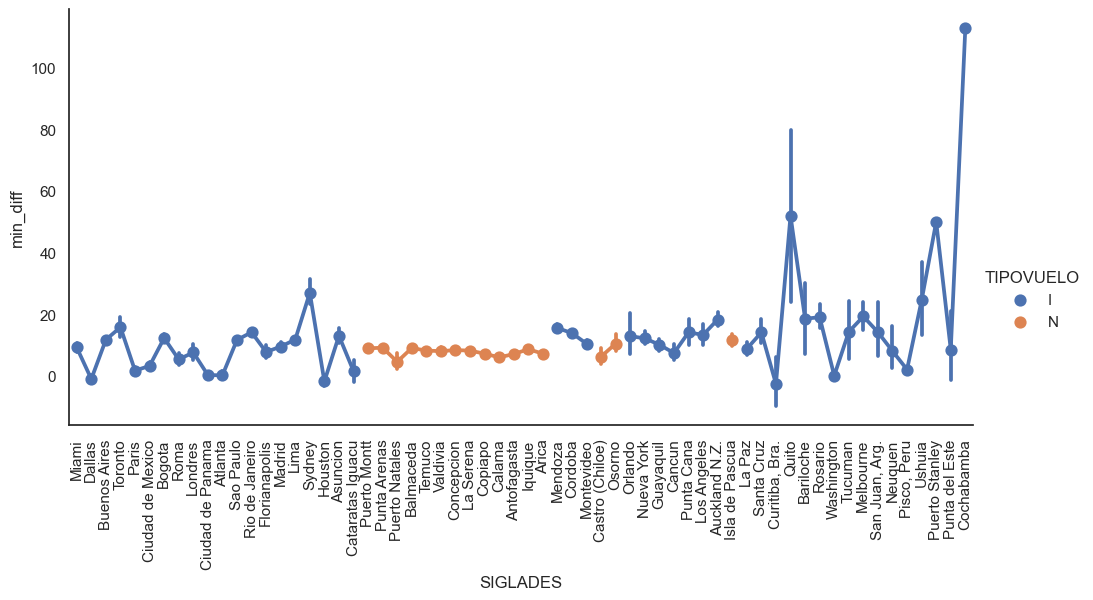

In [156]:
sns.catplot(x='SIGLADES', y='min_diff', hue = 'TIPOVUELO', data=df, kind='point', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

## Boxplot

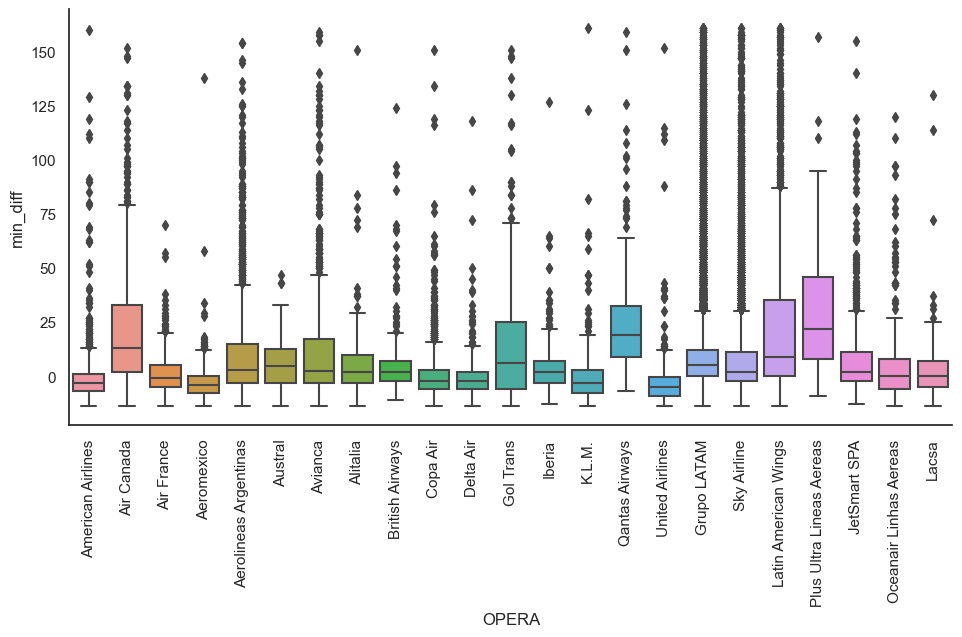

In [157]:
#HOW TO INTERPRET THIS? LOOK IT UP

sns.catplot(x='OPERA', y='min_diff', data=df, kind='box', height=5, aspect=2)
sns.set_style('whitegrid')
plt.xticks(rotation=90)

plt.show()

In [ ]:
#Creating a heatmap


In [ ]:
#Preguntas: Hay alguna correlacion entre aerolineas respecto a los atrasos? o correlacion respecto a los destinos, u horarios?
#What is the relationship between the delay and the destination, day or time? 
#what is the porcentage of delay of each airline?
#is there a pattern between the ones with higher percentages of delay?